In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
SIMULATION_OUTPUT="/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/development/project"

In [3]:
import pandas as pd

In [4]:
RELATIVE_FILE_PATH="results/output_lcadc_comp_differential_level_shifter.vcsv"

In [5]:
from pathlib import Path

In [6]:
filepath = Path(SIMULATION_OUTPUT)/RELATIVE_FILE_PATH

In [7]:
df = pd.read_csv(filepath, comment=';', header=None, 
                 names=["time_VOUT", "VOUT"])
df = df[["time_VOUT", "VOUT"]].copy()

In [8]:
df.head()

,time_VOUT,VOUT
0,0.000000e+00,0.0
1,5.000000e-07,0.0
2,5.312500e-07,0.0
3,5.468750e-07,0.0
4,5.781250e-07,0.0


In [9]:
import numpy as np

In [10]:
df["delayed"] = df["VOUT"].shift(periods=1, fill_value=0)

In [11]:
df.head()

,time_VOUT,VOUT,delayed
0,0.000000e+00,0.0,0.0
1,5.000000e-07,0.0,0.0
2,5.312500e-07,0.0,0.0
3,5.468750e-07,0.0,0.0
4,5.781250e-07,0.0,0.0


In [12]:
df["abs_diff"] = np.absolute(df["VOUT"] - df["delayed"])

In [13]:
df.head()

,time_VOUT,VOUT,delayed,abs_diff
0,0.000000e+00,0.0,0.0,0.0
1,5.000000e-07,0.0,0.0,0.0
2,5.312500e-07,0.0,0.0,0.0
3,5.468750e-07,0.0,0.0,0.0
4,5.781250e-07,0.0,0.0,0.0


In [14]:
ndf = df.loc[df["abs_diff"]!=0].copy()

In [15]:
ndf

,time_VOUT,VOUT,delayed,abs_diff
5088,0.000005,0.000005,0.000000,0.000005
5089,0.000005,0.000009,0.000005,0.000004
5090,0.000005,0.000012,0.000009,0.000004
5091,0.000005,0.000016,0.000012,0.000004
5092,0.000005,0.000019,0.000016,0.000003
...,...,...,...,...
3589619,0.007998,-0.443563,-0.443413,0.000150
3589620,0.007998,-0.443857,-0.443563,0.000293
3589621,0.007998,-0.444265,-0.443857,0.000408
3589622,0.007998,-0.444734,-0.444265,0.000469


In [16]:
ndf["time_diff"] = ndf["time_VOUT"].shift(periods=-1, fill_value=0) - ndf["time_VOUT"]

In [17]:
ndf

,time_VOUT,VOUT,delayed,abs_diff,time_diff
5088,0.000005,0.000005,0.000000,0.000005,7.974204e-12
5089,0.000005,0.000009,0.000005,0.000004,7.713272e-12
5090,0.000005,0.000012,0.000009,0.000004,7.880228e-12
5091,0.000005,0.000016,0.000012,0.000004,7.221728e-12
5092,0.000005,0.000019,0.000016,0.000003,5.687433e-12
...,...,...,...,...,...
3589619,0.007998,-0.443563,-0.443413,0.000150,3.129132e-10
3589620,0.007998,-0.443857,-0.443563,0.000293,4.357237e-10
3589621,0.007998,-0.444265,-0.443857,0.000408,5.004068e-10
3589622,0.007998,-0.444734,-0.444265,0.000469,6.168290e-10


In [18]:
sel_df = ndf.loc[ndf["time_diff"]>1e-8].copy()

In [19]:
sel_df

,time_VOUT,VOUT,delayed,abs_diff,time_diff
5286,0.000005,0.004687,0.004198,0.000490,3.847903e-07
7820,0.000006,0.000000,0.000461,0.000461,2.476191e-07
9158,0.000006,-0.004687,-0.004330,0.000357,2.364410e-07
10530,0.000006,-0.009375,-0.008815,0.000560,1.932492e-06
12676,0.000008,-0.004687,-0.004711,0.000023,1.530096e-06
...,...,...,...,...,...
3584665,0.007970,-0.421875,-0.421713,0.000162,4.286998e-06
3585623,0.007974,-0.426563,-0.426179,0.000384,4.555676e-06
3586659,0.007979,-0.431250,-0.431047,0.000203,5.341181e-06
3587627,0.007984,-0.435937,-0.435925,0.000012,6.315687e-06


In [20]:
nsel_df = sel_df[(sel_df["time_VOUT"]>1.04e-3) & (sel_df["time_VOUT"]<7.44e-3)]
nsel_df.head()

,time_VOUT,VOUT,delayed,abs_diff,time_diff
498493,0.001041,0.351562,0.351533,0.000029,0.000002
499672,0.001043,0.356250,0.356244,0.000006,0.000002
500494,0.001045,0.360938,0.360641,0.000297,0.000002
501717,0.001047,0.365625,0.365602,0.000023,0.000002
502689,0.001049,0.370312,0.370288,0.000024,0.000002


In [21]:
import matplotlib.pylab as plt

(array([1425.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1423.]),
 array([-0.0046875, -0.00375  , -0.0028125, -0.001875 , -0.0009375,
         0.       ,  0.0009375,  0.001875 ,  0.0028125,  0.00375  ,
         0.0046875]),
 <BarContainer object of 10 artists>)

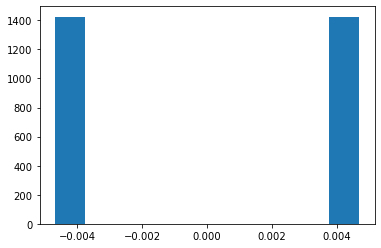

In [22]:
diff = nsel_df["VOUT"].shift(periods=-1, fill_value=0) - nsel_df["VOUT"]
diff = diff[:-1]
plt.hist(diff)

In [23]:
min(np.abs(diff))

0.004687499999999897

In [24]:
nsel_df["time_diff"].min()

1.338313534499612e-06

In [25]:
fs = 1/nsel_df["time_diff"].min()
fs

747209.0614206443

In [26]:
import matplotlib.pylab as plt

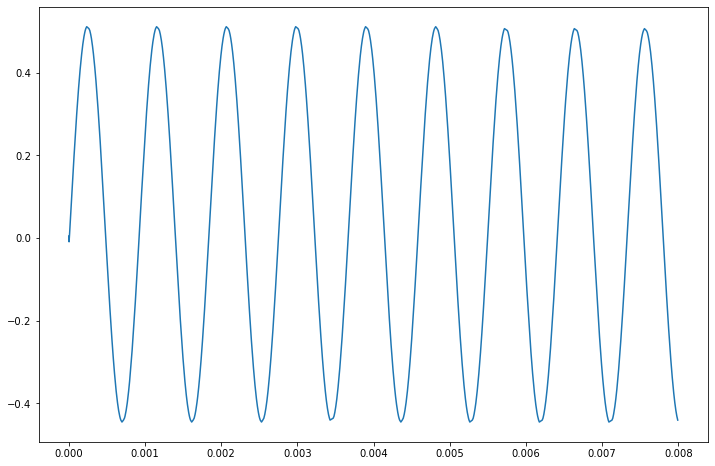

In [27]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.plot(sel_df["time_VOUT"],sel_df["VOUT"],'-')

In [28]:
from scipy import interpolate

In [29]:
def resample(x, y, X_new, kind):
    f = interpolate.interp1d(x, y, kind=kind)
    return f(X_new)

In [30]:
fs = 20e3
x = np.arange(0.00104, 0.00744, 1/fs)
y = resample(sel_df["time_VOUT"], sel_df["VOUT"],x,3)

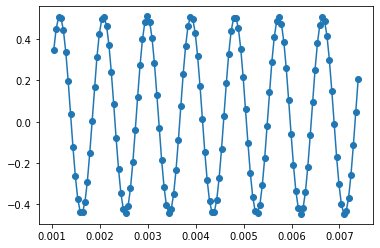

In [31]:
plt.plot(x,y,"-o")

In [32]:
from eapprocessor.tools.fft import fft

In [33]:
xf, yf = fft(np.array(y), fs)

In [34]:
def plot_spectrum_db(xf,yf,fs):
    fig= plt.figure(figsize=(8,6))
    ax = fig.add_subplot(1,1,1)
    ax.plot(xf,20*np.log10(np.abs(yf)),"--.")
    ax.grid()
    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylabel("Power density (dB)")
    ax.set_title(f"Spectrum at {fs}Hz sampling")

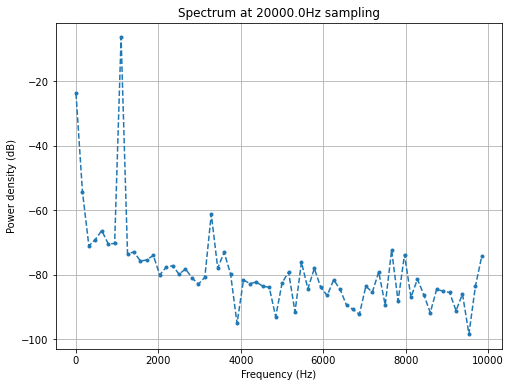

In [35]:
plot_spectrum_db(xf,yf,fs)

In [36]:
def calculate_snr(yf):
    peak_index = np.argmax(yf)
    noise = np.delete(yf,[0, peak_index],None)
    pw_signal = yf[peak_index]**2
    pw_noise = np.sum(np.power(noise, 2))
    return 10*np.log10(pw_signal/pw_noise)

In [37]:
def calculate_enob(snr):
    return (snr -1.76)/6.02

In [38]:
calculate_snr(yf)

45.94195823826201

In [39]:
calculate_enob(calculate_snr(yf))

7.339195720641531

In [40]:
import itertools
import pandas as pd
from pathlib import Path

In [41]:
#Defining parameters
kind_interpolator=[1,3,5]
fs=[20e3,40e3,100e3]
t_start=[0.00104]
t_stop=[0.00744]


In [42]:
args = [list(x) for x in itertools.product(fs,kind_interpolator, t_start, t_stop)]
args

[[20000.0, 1, 0.00104, 0.00744],
 [20000.0, 3, 0.00104, 0.00744],
 [20000.0, 5, 0.00104, 0.00744],
 [40000.0, 1, 0.00104, 0.00744],
 [40000.0, 3, 0.00104, 0.00744],
 [40000.0, 5, 0.00104, 0.00744],
 [100000.0, 1, 0.00104, 0.00744],
 [100000.0, 3, 0.00104, 0.00744],
 [100000.0, 5, 0.00104, 0.00744]]

In [43]:
def evaluate_parameters(*args):
    x = np.arange(args[2], args[3], 1/args[0])
    y = resample(sel_df["time_VOUT"], sel_df["VOUT"],x,args[1])
    xf, yf = fft(np.array(y), args[0])
    snr = calculate_snr(yf)
    enob = calculate_enob(snr)
    return {
        "time": x,
        "interpolated":y,
        "xf":xf,
        "yf":yf,
        "snr": snr,
        "enob": enob
    }

In [44]:
rows = [ x + [evaluate_parameters(*x)] for x in args]

In [45]:
df = pd.DataFrame(rows, columns=['fs', 'order_interpolator', 't_start', 't_stop','result'])
df

,fs,order_interpolator,t_start,t_stop,result
0,20000.0,1,0.00104,0.00744,"{'time': [0.00104, 0.0010899999999999998, 0.00..."
1,20000.0,3,0.00104,0.00744,"{'time': [0.00104, 0.0010899999999999998, 0.00..."
2,20000.0,5,0.00104,0.00744,"{'time': [0.00104, 0.0010899999999999998, 0.00..."
3,40000.0,1,0.00104,0.00744,"{'time': [0.00104, 0.001065, 0.00109, 0.001115..."
4,40000.0,3,0.00104,0.00744,"{'time': [0.00104, 0.001065, 0.00109, 0.001115..."
5,40000.0,5,0.00104,0.00744,"{'time': [0.00104, 0.001065, 0.00109, 0.001115..."
6,100000.0,1,0.00104,0.00744,"{'time': [0.00104, 0.00105, 0.00106, 0.00107, ..."
7,100000.0,3,0.00104,0.00744,"{'time': [0.00104, 0.00105, 0.00106, 0.00107, ..."
8,100000.0,5,0.00104,0.00744,"{'time': [0.00104, 0.00105, 0.00106, 0.00107, ..."


In [46]:
ndf = pd.DataFrame(df["result"].to_list(), index=df.index)
df[ndf.columns] = ndf
df.drop(columns=["result"], inplace=True)
df

,fs,order_interpolator,t_start,t_stop,time,interpolated,xf,yf,snr,enob
0,20000.0,1,0.00104,0.00744,"[0.00104, 0.0010899999999999998, 0.00113999999...","[0.34929197327631967, 0.4518228858522946, 0.50...","[0.0, 156.25, 312.5, 468.75, 625.0, 781.25, 93...","[0.06449683337418258, 0.0019642584005241746, 0...",45.564743,7.276535
1,20000.0,3,0.00104,0.00744,"[0.00104, 0.0010899999999999998, 0.00113999999...","[0.34929815778903683, 0.4518581360167062, 0.50...","[0.0, 156.25, 312.5, 468.75, 625.0, 781.25, 93...","[0.06448555231661202, 0.0019441339271491925, 0...",45.941958,7.339196
2,20000.0,5,0.00104,0.00744,"[0.00104, 0.0010899999999999998, 0.00113999999...","[0.34930178232486936, 0.4518659107549342, 0.50...","[0.0, 156.25, 312.5, 468.75, 625.0, 781.25, 93...","[0.06450524373973615, 0.0019292629719436232, 0...",45.960781,7.342322
3,40000.0,1,0.00104,0.00744,"[0.00104, 0.001065, 0.00109, 0.001115, 0.00114...","[0.34929197327631967, 0.40597837548762694, 0.4...","[0.0, 156.25, 312.5, 468.75, 625.0, 781.25, 93...","[0.06449738883857263, 0.0019542129915246917, 0...",45.602634,7.282830
4,40000.0,3,0.00104,0.00744,"[0.00104, 0.001065, 0.00109, 0.001115, 0.00114...","[0.34929815778903683, 0.4059646939458953, 0.45...","[0.0, 156.25, 312.5, 468.75, 625.0, 781.25, 93...","[0.06448048557884303, 0.0019474082714903494, 0...",45.854533,7.324673
5,40000.0,5,0.00104,0.00744,"[0.00104, 0.001065, 0.00109, 0.001115, 0.00114...","[0.34930178232486936, 0.4059603453323761, 0.45...","[0.0, 156.25, 312.5, 468.75, 625.0, 781.25, 93...","[0.06450379806269695, 0.001939339631435791, 0....",45.820175,7.318966
6,100000.0,1,0.00104,0.00744,"[0.00104, 0.00105, 0.00106, 0.00107, 0.00108, ...","[0.34929197327631967, 0.37313229019561134, 0.3...","[0.0, 156.25, 312.5, 468.75, 625.0, 781.25, 93...","[0.06448417092729596, 0.001959058573565952, 0....",45.585374,7.279962
7,100000.0,3,0.00104,0.00744,"[0.00104, 0.00105, 0.00106, 0.00107, 0.00108, ...","[0.34929815778903683, 0.37314702774407565, 0.3...","[0.0, 156.25, 312.5, 468.75, 625.0, 781.25, 93...","[0.06446118828226022, 0.001958222127999247, 0....",45.802977,7.316109
8,100000.0,5,0.00104,0.00744,"[0.00104, 0.00105, 0.00106, 0.00107, 0.00108, ...","[0.34930178232486936, 0.3731501974840073, 0.39...","[0.0, 156.25, 312.5, 468.75, 625.0, 781.25, 93...","[0.06447923439156891, 0.0019498657803991776, 0...",45.781008,7.312460


In [47]:
df.drop(columns=["xf","yf", "interpolated", "time"])

,fs,order_interpolator,t_start,t_stop,snr,enob
0,20000.0,1,0.00104,0.00744,45.564743,7.276535
1,20000.0,3,0.00104,0.00744,45.941958,7.339196
2,20000.0,5,0.00104,0.00744,45.960781,7.342322
3,40000.0,1,0.00104,0.00744,45.602634,7.282830
4,40000.0,3,0.00104,0.00744,45.854533,7.324673
5,40000.0,5,0.00104,0.00744,45.820175,7.318966
6,100000.0,1,0.00104,0.00744,45.585374,7.279962
7,100000.0,3,0.00104,0.00744,45.802977,7.316109
8,100000.0,5,0.00104,0.00744,45.781008,7.312460


In [48]:
enob = df.loc[df["order_interpolator"]==3, "enob"].mean()
enob

7.32665935174805

In [49]:
power = 4.3e-6
fom = power/(40e3*(2**enob))
fom

6.696752235985917e-13